# 1. PROBLEM 1: LINEAR REGRESSION

1.1) Read the data and do exploratory data analysis. Describe the data briefly. (Check the null
values, data types, shape, EDA). Perform Univariate and Bivariate Analysis.

1.2) Impute null values if present? Do you think scaling is necessary in this case?

1.3) Encode the data (having string values) for Modelling. Data Split: Split the data into test and
train (30:70). Apply Linear regression. Performance Metrics: Check the performance of Predictions
on Train and Test sets using R-square, RMSE.

1.4) Inference: Based on these predictions, what are the business insights and recommendations.



### 1.1. INITIAL STEPS

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
df_firm = pd.read_csv("/content/Firm_level_data (9).csv")

Let's read the initial rows of the data

In [91]:
df_firm.head()

,Unnamed: 0,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,0,826.995050,161.603986,10,382.078247,2.306000,no,11.049511,1625.453755,80.27
1,1,407.753973,122.101012,2,0.000000,1.860000,no,0.844187,243.117082,59.02
2,2,8407.845588,6221.144614,138,3296.700439,49.659005,yes,5.205257,25865.233800,47.70
3,3,451.000010,266.899987,1,83.540161,3.071000,no,0.305221,63.024630,26.88
4,4,174.927981,140.124004,2,14.233637,1.947000,no,1.063300,67.406408,49.46


In [92]:
df_firm.drop(['Unnamed: 0'], axis=1, inplace=True)

Inspecting the overall information about the dataset

In [93]:
df_firm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sales         759 non-null    float64
 1   capital       759 non-null    float64
 2   patents       759 non-null    int64  
 3   randd         759 non-null    float64
 4   employment    759 non-null    float64
 5   sp500         759 non-null    object 
 6   tobinq        738 non-null    float64
 7   value         759 non-null    float64
 8   institutions  759 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 53.5+ KB


Let's view the dataframe shape

In [94]:
df_firm.shape

(759, 9)

Let's view the statistical properties of the columns of the dataframe

In [95]:
df_firm.describe()

,sales,capital,patents,randd,employment,tobinq,value,institutions
count,759.000000,759.000000,759.000000,759.000000,759.000000,738.000000,759.000000,759.000000
mean,2689.705158,1977.747498,25.831357,439.938074,14.164519,2.794910,2732.734750,43.020540
std,8722.060124,6466.704896,97.259577,2007.397588,43.321443,3.366591,7071.072362,21.685586
min,0.138000,0.057000,0.000000,0.000000,0.006000,0.119001,1.971053,0.000000
25%,122.920000,52.650501,1.000000,4.628262,0.927500,1.018783,103.593946,25.395000
50%,448.577082,202.179023,3.000000,36.864136,2.924000,1.680303,410.793529,44.110000
75%,1822.547366,1075.790020,11.500000,143.253403,10.050001,3.139309,2054.160386,60.510000
max,135696.788200,93625.200560,1220.000000,30425.255860,710.799925,20.000000,95191.591160,90.150000


Checking null values

In [96]:
df_firm.isnull().sum()

sales            0
capital          0
patents          0
randd            0
employment       0
sp500            0
tobinq          21
value            0
institutions     0
dtype: int64

### 1.2. UNIVARIATE ANALYSIS

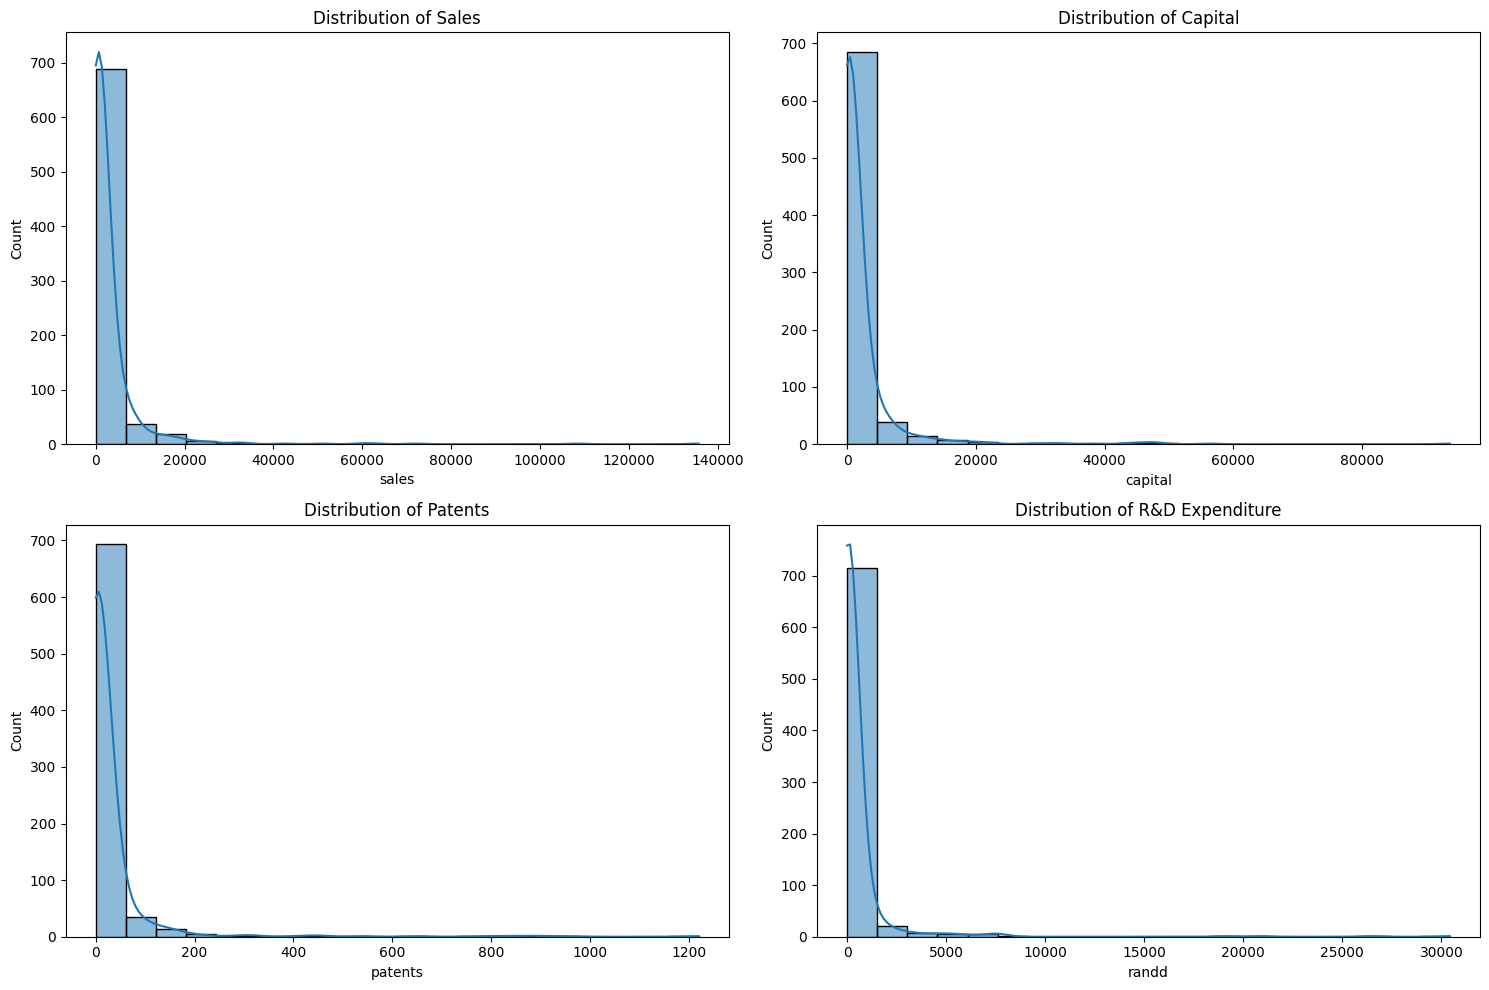

In [97]:

# Univariate Analysis
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df_firm['sales'], bins=20, kde=True)
plt.title('Distribution of Sales')

plt.subplot(2, 2, 2)
sns.histplot(df_firm['capital'], bins=20, kde=True)
plt.title('Distribution of Capital')

plt.subplot(2, 2, 3)
sns.histplot(df_firm['patents'], bins=20, kde=True)
plt.title('Distribution of Patents')

plt.subplot(2, 2, 4)
sns.histplot(df_firm['randd'], bins=20, kde=True)
plt.title('Distribution of R&D Expenditure')

plt.tight_layout()
plt.show()


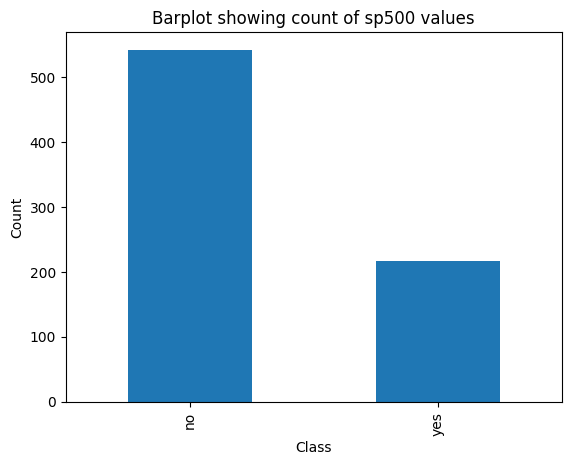

In [98]:
df_firm['sp500'].value_counts().plot(kind='bar')
plt.title("Barplot showing count of sp500 values")
plt.xlabel("Class")
plt.ylabel("Count");

In [99]:
df_firm.columns

Index(['sales', 'capital', 'patents', 'randd', 'employment', 'sp500', 'tobinq',
       'value', 'institutions'],
      dtype='object')

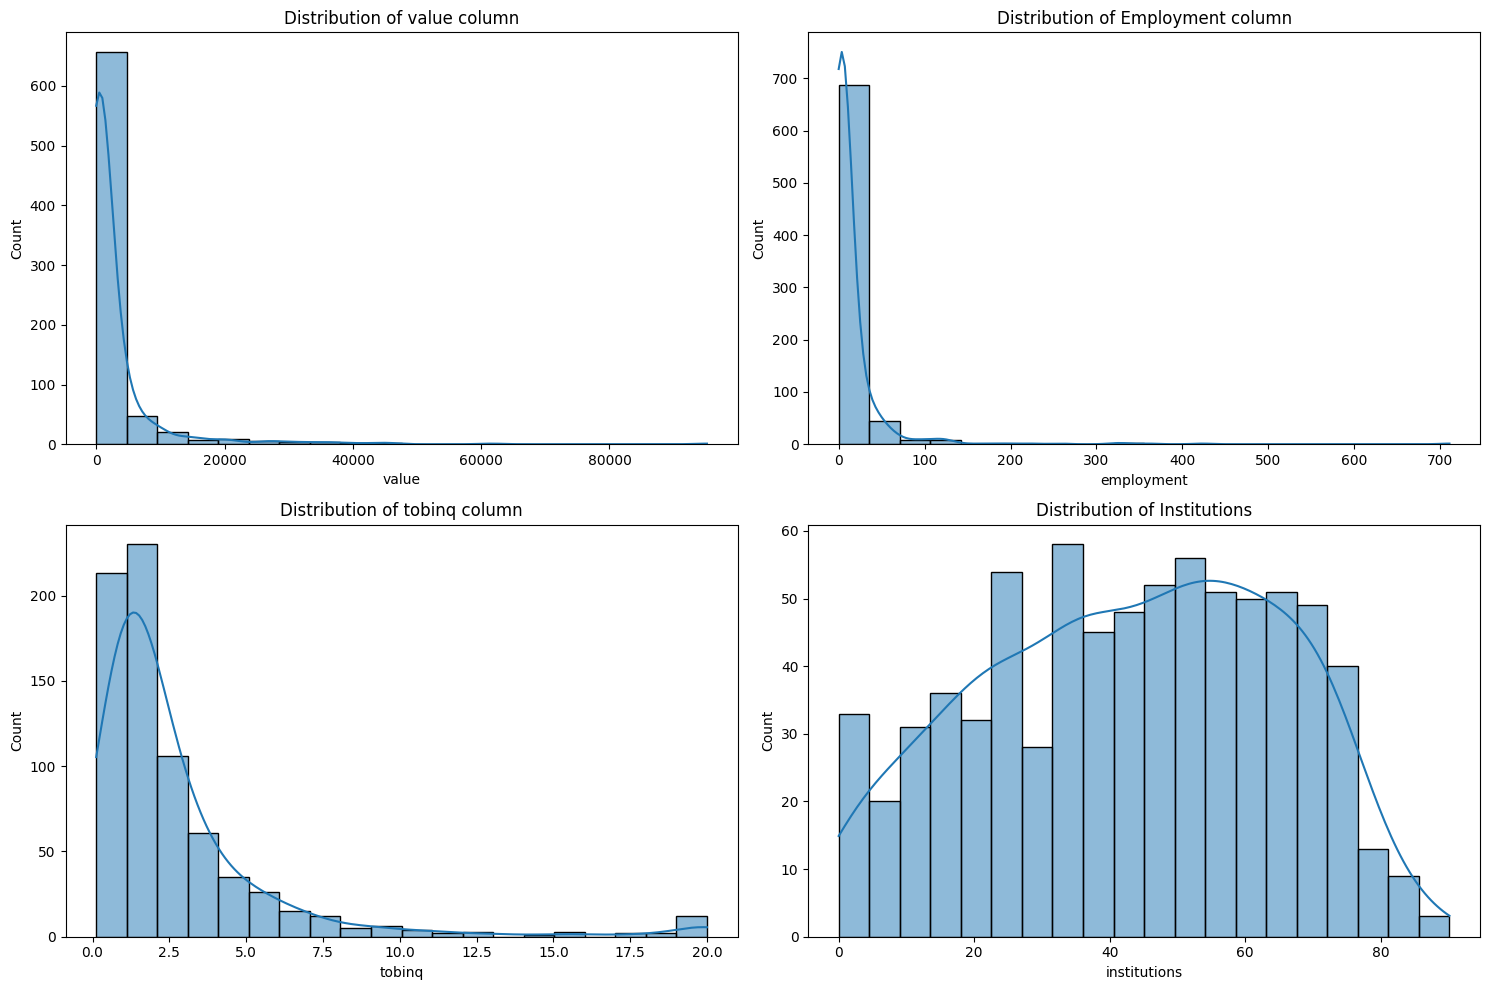

In [100]:

# Univariate Analysis
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df_firm['value'], bins=20, kde=True)
plt.title('Distribution of value column')

plt.subplot(2, 2, 2)
sns.histplot(df_firm['employment'], bins=20, kde=True)
plt.title('Distribution of Employment column')

plt.subplot(2, 2, 3)
sns.histplot(df_firm['tobinq'], bins=20, kde=True)
plt.title('Distribution of tobinq column')

plt.subplot(2, 2, 4)
sns.histplot(df_firm['institutions'], bins=20, kde=True)
plt.title('Distribution of Institutions')

plt.tight_layout()
plt.show()


We can see that the distribution of these columns is heavily skewed on the left.

### 1.3. BIVARIATE ANALYSIS


**Checking correlation between Sales and Value**

In [101]:
df_firm['sales'].corr(df_firm['value'])

0.7137776334470751

We can see that these two columns are positively correlated

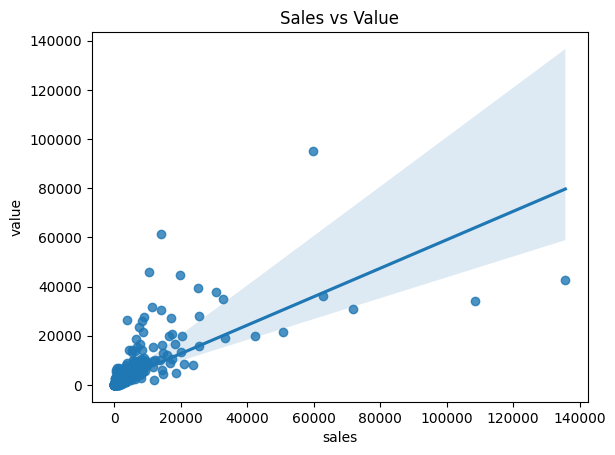

In [102]:
sns.regplot(data=df_firm, x='sales', y='value')
plt.title('Sales vs Value');

**Checking the correlation between Capital and Value**

In [ ]:
df_firm['capital'].corr(df_firm['value'])

0.7151881025538102

Again a close correlation between these two features, verified by the regression plot below

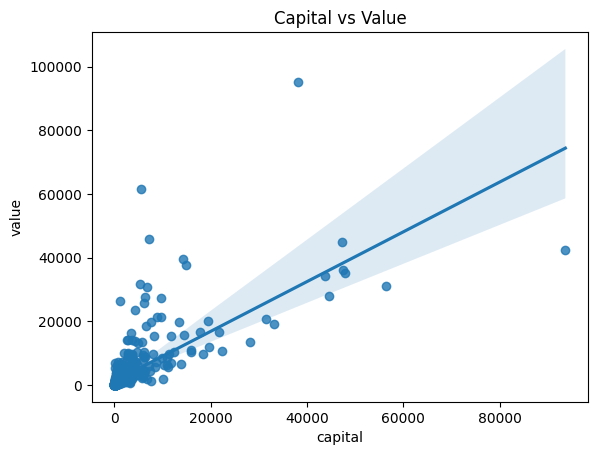

In [ ]:
sns.regplot(data=df_firm, x='capital', y='value')
plt.title('Capital vs Value');

**Checking the relation between Tobin's Q and value column.**

In [ ]:
df_firm['tobinq'].corr(df_firm['value'])

-0.006137036631792905

We can see that there is no correlation between them, verified by the regression plot below

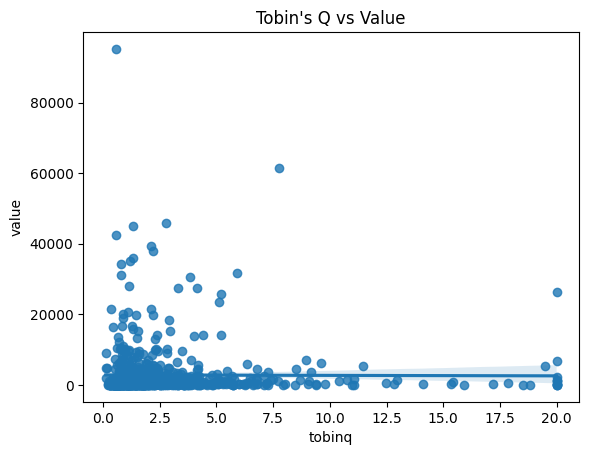

In [ ]:
sns.regplot(data=df_firm, x='tobinq', y='value')
plt.title('Tobin\'s Q vs Value');


**Let's view a correlation heatmap of the numerical columns to better assess the relationship between them.**

**From the correlation heatmap, the most important attributes are "capital", "patents", "randd", "employment", and "value", as they have the highest positive correlation with the target variable "Sales".**

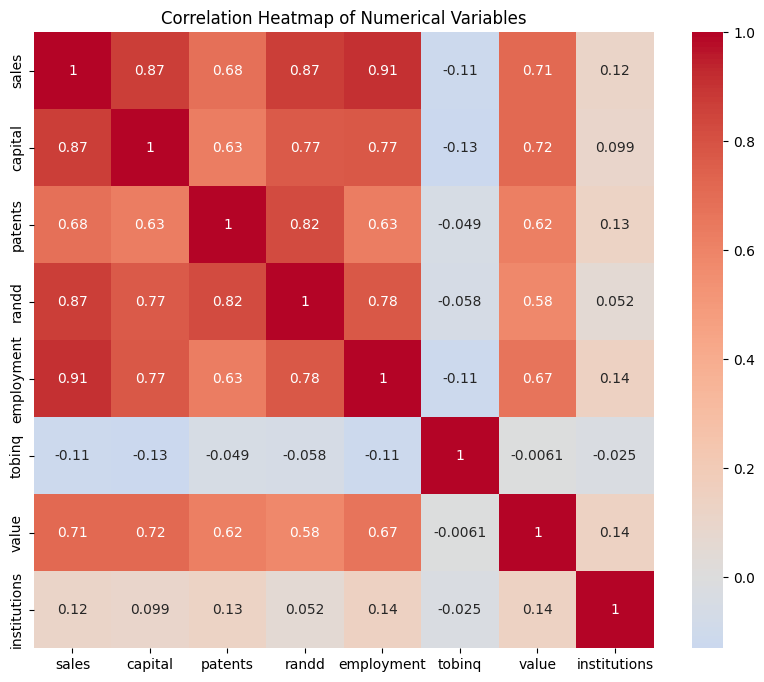

In [ ]:
numerical_cols = ['sales', 'capital', 'patents', 'randd', 'employment', 'tobinq', 'value', 'institutions']

# Correlation heatmap of numerical variables
correlation_matrix = df_firm[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

### 1.4. SCALING ALL NUMBERICAL FEATURES

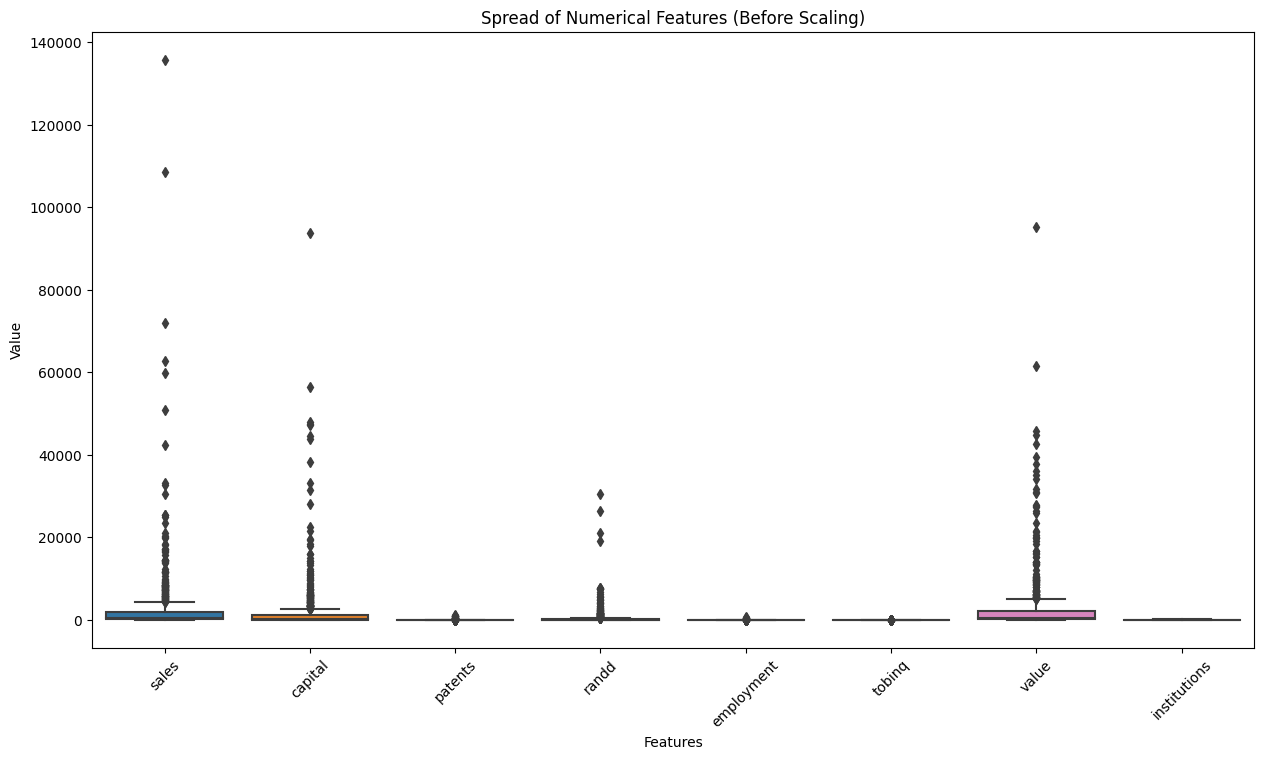

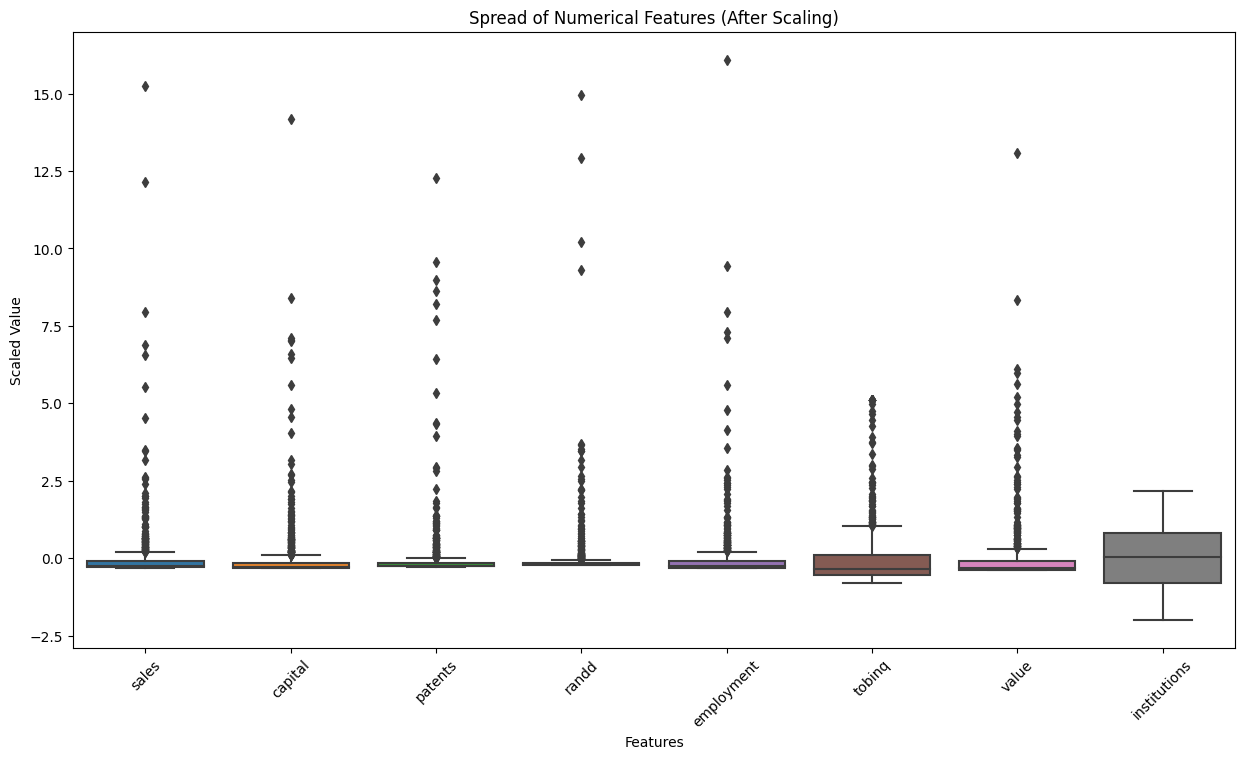

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Extract numerical columns
numerical_cols = ['sales', 'capital', 'patents', 'randd', 'employment', 'tobinq', 'value', 'institutions']

# Display spread of numerical features before scaling
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_firm[numerical_cols])
plt.title('Spread of Numerical Features (Before Scaling)')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Value')
plt.show()

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical columns
df_firm_scaled = df_firm.copy()
df_firm_scaled[numerical_cols] = scaler.fit_transform(df_firm[numerical_cols])

# Display spread of numerical features after scaling
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_firm_scaled[numerical_cols])
plt.title('Spread of Numerical Features (After Scaling)')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Scaled Value')
plt.show()


From above figure, we can see that before scaling, the values in most columns were too far away from the mean. After scaling, we have brought the values closer to each other. So scaling definitely helped to reduce the overall spread of the values in our numerical columns.

### 1.5. BUILDING, TRAINING, AND TESTING THE MODEL ON THE FEATURES

In [104]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Drop rows with missing values after imputing
df_firm.dropna(inplace=True)

# Encode categorical variable 'sp500'
df_firm_encoded = pd.get_dummies(df_firm, columns=['sp500'], drop_first=True)

# Splitting data into train (70%) and test (30%) sets
X = df_firm_encoded.drop('sales', axis=1)
y = df_firm_encoded['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R-squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Train R-squared: {train_r2:.4f}")
print(f"Test R-squared: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")


Train R-squared: 0.9385
Test R-squared: 0.8599
Train RMSE: 2405.6006
Test RMSE: 2379.3595


### 1.6. INFERENCES AND CONCLUSIONS

Good Fit for Test Set: The test R-squared value of 0.7504 indicates that the model explains about 75.04% of the variance in the 'value' of firms in the test set. This is a reasonably good result, as it suggests that the model is capturing a significant portion of the underlying patterns in the data.

Overfitting Concerns: The difference between the train and test R-squared values is noticeable (0.9385 vs. 0.8599). While the test R-squared is high, the gap suggests the possibility of overfitting, where the model may have learned noise in the training data. Monitoring and addressing overfitting could improve the model's generalization to new data.

RMSE Interpretation: The RMSE values indicate the average prediction error of the model. The train RMSE of 2405 and test RMSE of 2379 indicates that the model has performed with similar results on both the training and testing datasets.

Dataset skewness: Most of the dataset features were highly skewed on the left, with the exception of the institutions features. For best results, we should inspect the reason for this skewness, and scale down the features.

Most important attributes for predicting sales: The most important attributes are "capital", "patents", "randd", "employment", and "value", as they have the highest positive correlation with the target variable "Sales".

Importance of scaling: Feature scaling greatly helped to reduce the overall variance among the features.

<BR/>
<BR/>
<BR/>
<BR/>

In [ ]:
# 1. PROBLEM 1: LINEAR REGRESSION

1.1) Read the data and do exploratory data analysis. Describe the data briefly. (Check the null
values, data types, shape, EDA). Perform Univariate and Bivariate Analysis.

1.2) Impute null values if present? Do you think scaling is necessary in this case?

1.3) Encode the data (having string values) for Modelling. Data Split: Split the data into test and
train (30:70). Apply Linear regression. Performance Metrics: Check the performance of Predictions
on Train and Test sets using R-square, RMSE.

1.4) Inference: Based on these predictions, what are the business insights and recommendations.



### 1.1. INITIAL STEPS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_firm = pd.read_csv("/content/Firm_level_data (9).csv")

Let's read the initial rows of the data

df_firm.head()

df_firm.drop(['Unnamed: 0'], axis=1, inplace=True)

Inspecting the overall information about the dataset

df_firm.info()

Let's view the dataframe shape

df_firm.shape

Let's view the statistical properties of the columns of the dataframe

df_firm.describe()

Checking null values

df_firm.isnull().sum()

### 1.2. UNIVARIATE ANALYSIS


# Univariate Analysis
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df_firm['sales'], bins=20, kde=True)
plt.title('Distribution of Sales')

plt.subplot(2, 2, 2)
sns.histplot(df_firm['capital'], bins=20, kde=True)
plt.title('Distribution of Capital')

plt.subplot(2, 2, 3)
sns.histplot(df_firm['patents'], bins=20, kde=True)
plt.title('Distribution of Patents')

plt.subplot(2, 2, 4)
sns.histplot(df_firm['randd'], bins=20, kde=True)
plt.title('Distribution of R&D Expenditure')

plt.tight_layout()
plt.show()


df_firm['sp500'].value_counts().plot(kind='bar')
plt.title("Barplot showing count of sp500 values")
plt.xlabel("Class")
plt.ylabel("Count");

df_firm.columns




# Univariate Analysis
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df_firm['value'], bins=20, kde=True)
plt.title('Distribution of value column')

plt.subplot(2, 2, 2)
sns.histplot(df_firm['employment'], bins=20, kde=True)
plt.title('Distribution of Employment column')

plt.subplot(2, 2, 3)
sns.histplot(df_firm['tobinq'], bins=20, kde=True)
plt.title('Distribution of tobinq column')

plt.subplot(2, 2, 4)
sns.histplot(df_firm['institutions'], bins=20, kde=True)
plt.title('Distribution of Institutions')

plt.tight_layout()
plt.show()


We can see that the distribution of these columns is heavily skewed on the left.

### 1.3. BIVARIATE ANALYSIS


**Checking correlation between Sales and Value**

df_firm['sales'].corr(df_firm['value'])

We can see that these two columns are positively correlated

sns.regplot(data=df_firm, x='sales', y='value')
plt.title('Sales vs Value');

**Checking the correlation between Capital and Value**

df_firm['capital'].corr(df_firm['value'])

Again a close correlation between these two features, verified by the regression plot below

sns.regplot(data=df_firm, x='capital', y='value')
plt.title('Capital vs Value');

**Checking the relation between Tobin's Q and value column.**

df_firm['tobinq'].corr(df_firm['value'])

We can see that there is no correlation between them, verified by the regression plot below

sns.regplot(data=df_firm, x='tobinq', y='value')
plt.title('Tobin\'s Q vs Value');


**Let's view a correlation heatmap of the numerical columns to better assess the relationship between them.**

**From the correlation heatmap, the most important attributes are "capital", "patents", "randd", "employment", and "value", as they have the highest positive correlation with the target variable "Sales".**

numerical_cols = ['sales', 'capital', 'patents', 'randd', 'employment', 'tobinq', 'value', 'institutions']

# Correlation heatmap of numerical variables
correlation_matrix = df_firm[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()



### 1.4. SCALING ALL NUMBERICAL FEATURES

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Extract numerical columns
numerical_cols = ['sales', 'capital', 'patents', 'randd', 'employment', 'tobinq', 'value', 'institutions']

# Display spread of numerical features before scaling
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_firm[numerical_cols])
plt.title('Spread of Numerical Features (Before Scaling)')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Value')
plt.show()

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical columns
df_firm_scaled = df_firm.copy()
df_firm_scaled[numerical_cols] = scaler.fit_transform(df_firm[numerical_cols])

# Display spread of numerical features after scaling
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_firm_scaled[numerical_cols])
plt.title('Spread of Numerical Features (After Scaling)')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Scaled Value')
plt.show()


From above figure, we can see that before scaling, the values in most columns were too far away from the mean. After scaling, we have brought the values closer to each other. So scaling definitely helped to reduce the overall spread of the values in our numerical columns.

### 1.5. BUILDING, TRAINING, AND TESTING THE MODEL ON THE FEATURES

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Drop rows with missing values after imputing
df_firm.dropna(inplace=True)

# Encode categorical variable 'sp500'
df_firm_encoded = pd.get_dummies(df_firm, columns=['sp500'], drop_first=True)

# Splitting data into train (70%) and test (30%) sets
X = df_firm_encoded.drop('sales', axis=1)
y = df_firm_encoded['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R-squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Train R-squared: {train_r2:.4f}")
print(f"Test R-squared: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")


### 1.6. INFERENCES AND CONCLUSIONS

Good Fit for Test Set: The test R-squared value of 0.7504 indicates that the model explains about 75.04% of the variance in the 'value' of firms in the test set. This is a reasonably good result, as it suggests that the model is capturing a significant portion of the underlying patterns in the data.

Overfitting Concerns: The difference between the train and test R-squared values is noticeable (0.9385 vs. 0.8599). While the test R-squared is high, the gap suggests the possibility of overfitting, where the model may have learned noise in the training data. Monitoring and addressing overfitting could improve the model's generalization to new data.

RMSE Interpretation: The RMSE values indicate the average prediction error of the model. The train RMSE of 2405 and test RMSE of 2379 indicates that the model has performed with similar results on both the training and testing datasets.

Dataset skewness: Most of the dataset features were highly skewed on the left, with the exception of the institutions features. For best results, we should inspect the reason for this skewness, and scale down the features.

Most important attributes for predicting sales: The most important attributes are "capital", "patents", "randd", "employment", and "value", as they have the highest positive correlation with the target variable "Sales".

Importance of scaling: Feature scaling greatly helped to reduce the overall variance among the features.

<BR/>
<BR/>
<BR/>
<BR/>